In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

 ## Récupération, lecture et traitement des données

In [2]:
fname = "dataVelib.pkl"
f= open(fname,'rb')
data = pkl.load(f, encoding='latin1')
f.close()

In [3]:
for station in data:
    print(station)

{'status': 'OPEN', 'contract_name': 'Paris', 'name': '31705 - CHAMPEAUX (BAGNOLET)', 'bonus': True, 'bike_stands': 50, 'number': 31705, 'last_update': 1410616150000, 'available_bike_stands': 48, 'banking': True, 'available_bikes': 1, 'address': 'RUE DES CHAMPEAUX (PRES DE LA GARE ROUTIERE) - 93170 BAGNOLET', 'position': {'lat': 48.8645278209514, 'lng': 2.416170724425901}, 'alt': 74.37134552001953}
{'status': 'OPEN', 'contract_name': 'Paris', 'name': '10042 - POISSONNIÈRE - ENGHIEN', 'bonus': False, 'bike_stands': 33, 'number': 10042, 'last_update': 1410616620000, 'available_bike_stands': 30, 'banking': True, 'available_bikes': 3, 'address': "52 RUE D'ENGHIEN / ANGLE RUE DU FAUBOURG POISSONIERE - 75010 PARIS", 'position': {'lat': 48.87242006305313, 'lng': 2.348395236282807}, 'alt': 36.12334823608398}
{'status': 'OPEN', 'contract_name': 'Paris', 'name': '08020 - METRO ROME', 'bonus': True, 'bike_stands': 44, 'number': 8020, 'last_update': 1410616439000, 'available_bike_stands': 43, 'bank

In [4]:
for station in data:
    nbVeloDispo = station['available_bikes']
    print(nbVeloDispo)

1
3
1
18
6
0
14
2
0
1
28
0
1
5
27
2
13
1
0
57
5
0
1
7
0
0
8
2
7
3
0
2
8
16
1
1
0
4
3
21
44
0
2
15
44
30
12
14
5
5
54
1
11
27
18
2
0
31
11
15
0
34
0
10
3
0
4
52
19
4
19
9
25
1
6
8
7
0
2
0
1
25
12
54
3
1
0
5
0
2
28
0
54
14
10
2
15
10
0
46
15
30
34
0
1
1
13
22
42
5
39
10
19
23
0
9
4
35
13
2
16
0
1
0
1
4
8
0
22
14
26
0
12
2
2
1
13
0
0
15
60
3
3
7
34
4
0
26
18
1
5
0
15
17
0
0
0
3
6
2
0
2
0
33
32
7
1
2
2
6
1
41
7
6
21
0
28
55
16
18
5
2
1
39
18
0
45
2
13
3
0
0
2
19
19
0
14
1
3
3
0
2
1
40
19
10
26
28
1
0
0
36
2
15
27
6
16
13
3
0
17
0
0
1
14
1
1
7
0
3
0
0
2
3
0
2
3
1
10
35
4
1
4
1
0
2
0
12
3
19
47
0
0
4
38
2
0
22
33
0
4
2
0
1
6
31
0
0
31
1
0
0
1
0
0
0
4
1
0
17
18
3
3
12
15
0
0
0
0
0
26
0
11
32
2
13
1
38
30
36
32
26
0
21
24
18
56
4
20
0
2
1
1
1
35
6
45
42
3
1
32
2
44
1
59
0
2
1
0
20
0
2
47
5
3
19
0
2
12
1
1
0
2
0
4
31
66
19
1
46
1
3
1
9
1
3
1
0
0
53
15
27
0
26
2
18
10
0
0
2
2
17
16
34
1
0
20
2
49
3
25
1
17
12
22
0
2
16
5
20
7
18
0
4
0
25
15
1
12
2
18
5
1
36
5
50
1
0
15
13
6
42
1
0
28
5
0
0
12
4


#### Mise en forme et élimination du bruit 

In [5]:
stations = []
for station in data:
    arr = station['number'] // 1000
    if arr > 0 and arr <= 20:
        stations.append({
            "lat":station['position']['lat'],
            "lng":station['position']['lng'],
            "alt":station['alt'],
            "arr":arr,
            "places totales":station['bike_stands'],
            "places dispo":station['available_bike_stands']
        })

In [6]:
df = pd.DataFrame(stations)
df.head()

,alt,arr,lat,lng,places dispo,places totales
0,36.123348,10,48.872420,2.348395,30,33
1,53.454689,8,48.882149,2.319860,43,44
2,34.800900,1,48.868217,2.330494,19,37
3,65.043762,20,48.870394,2.384222,26,26
4,48.124622,15,48.834659,2.295789,22,24


## Distributions de probabilités

#### Calcul de PAr

In [7]:
PAr = [0]*20
for station in stations:
    PAr[station['arr'] - 1] += 1
PAr = [p/len(stations) for p in PAr]
print(PAr)

[0.028282828282828285, 0.024242424242424242, 0.015151515151515152, 0.024242424242424242, 0.03838383838383838, 0.03333333333333333, 0.029292929292929294, 0.05858585858585859, 0.045454545454545456, 0.052525252525252523, 0.05555555555555555, 0.06363636363636363, 0.07171717171717172, 0.05656565656565657, 0.08585858585858586, 0.06363636363636363, 0.0595959595959596, 0.06262626262626263, 0.06363636363636363, 0.06767676767676768]


#### Calcul de PAl

[12. 25. 35. 43. 72. 75. 58. 35. 30. 20. 14. 17. 20. 17. 13. 24. 15. 18.
 14. 23. 18. 20. 28. 35. 30. 20. 16. 22. 16. 19. 12. 17. 11. 11. 12. 12.
 16.  7.  8.  2.  4.  4.  2.  3.  1.  2.  1.  4.  1.  4.  2.  0.  1.  1.
  4.  2.  3.  0.  2.  1.  0.  2.  1.  0.  1.  1.  3.  2.  0.  2.  0.  2.
  1.  0.  2.  1.  1.  1.  1.  0.  0.  1.  1.  2.  0.  0.  0.  0.  0.  1.
  3.  2.  0.  0.  2.  1.  0.  1.  0.  1.]
[  0.          30.82790375  31.74976112  32.6716185   33.59347588
  34.51533325  35.43719063  36.359048    37.28090538  38.20276276
  39.12462013  40.04647751  40.96833488  41.89019226  42.81204964
  43.73390701  44.65576439  45.57762177  46.49947914  47.42133652
  48.34319389  49.26505127  50.18690865  51.10876602  52.0306234
  52.95248077  53.87433815  54.79619553  55.7180529   56.63991028
  57.56176765  58.48362503  59.40548241  60.32733978  61.24919716
  62.17105453  63.09291191  64.01476929  64.93662666  65.85848404
  66.78034142  67.70219879  68.62405617  69.54591354  70.46777092


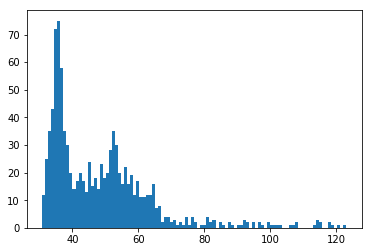

In [8]:
nbIntervallesAlt = 100
altitudes = [station['alt'] for station in stations]
res = plt.hist(altitudes, nbIntervallesAlt)
eff = res[0] # effectif dans les intervalles
intervallesAlt = list(res[1]) # definition des intervalles
intervallesAlt.insert(0,0)
print(eff)
intervallesAlt = np.array(intervallesAlt)
print(intervallesAlt)
PAl = [p/len(stations) for p in eff]
print(PAl)

#### Calcul de P[Sp|Al]

In [9]:
pSpSAl = []
for i in range(2):
    pSpSAl.append([0]*(nbIntervallesAlt+1))
    
nbSp = [0]*(nbIntervallesAlt+1)
for i in range(nbIntervallesAlt+1):
    for station in stations:
        if intervallesAlt[i] <= station['alt'] <= intervallesAlt[i+1]:
            if station['places dispo'] == 0:
                pSpSAl[1][i] += 1
            else:
                pSpSAl[0][i] += 1
            nbSp[i] += 1
for i in range(2):
    for j in range(nbIntervallesAlt+1):
        if nbSp[j] > 0:
            pSpSAl[i][j] /= nbSp[j]
print(pSpSAl)

[[1.0, 0.8333333333333334, 0.76, 0.8857142857142857, 0.8837209302325582, 0.8055555555555556, 0.8933333333333333, 0.7931034482758621, 0.8285714285714286, 0.9, 1.0, 0.9285714285714286, 0.9411764705882353, 0.95, 1.0, 1.0, 0.9583333333333334, 1.0, 0.9444444444444444, 0.9285714285714286, 0.9565217391304348, 0.8888888888888888, 0.95, 0.9285714285714286, 1.0, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.75, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0.5, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0], [0.0, 0.16666666666666666, 0.24, 0.11428571428571428, 0.11627906976744186, 0.19444444444444445, 0.10666666666666667, 0.20689655172413793, 0.17142857142857143, 0.1, 0.0, 0.07142857142857142, 0.058823529411764705, 0.05, 0.0, 0.0, 0.041666666666666664, 0.0, 0.05555555555555555, 0.071428

#### Calcul de P[Vd|Al]

In [10]:
pVdSAl = []
for i in range(2):
    pVdSAl.append([0]*(nbIntervallesAlt+1))
    
nbVd = [0]*(nbIntervallesAlt+1)
for i in range((nbIntervallesAlt+1)):
    for station in stations:
        if intervallesAlt[i] <= station['alt'] <= intervallesAlt[i+1]:
            if station['places dispo'] >= 2:
                pVdSAl[1][i] += 1
            else:
                pVdSAl[0][i] += 1
            nbVd[i] += 1
for i in range(2):
    for j in range((nbIntervallesAlt+1)):
        if nbVd[j] > 0:
            pVdSAl[i][j] /= nbVd[j]
print(pVdSAl)

[[0.0, 0.25, 0.24, 0.17142857142857143, 0.16279069767441862, 0.2777777777777778, 0.18666666666666668, 0.27586206896551724, 0.2, 0.16666666666666666, 0.05, 0.07142857142857142, 0.058823529411764705, 0.05, 0.0, 0.0, 0.041666666666666664, 0.0, 0.05555555555555555, 0.07142857142857142, 0.043478260869565216, 0.16666666666666666, 0.1, 0.07142857142857142, 0.0, 0.03333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.5, 0.0, 0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 1.0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0.0, 0, 0.0, 0, 0.0], [1.0, 0.75, 0.76, 0.8285714285714286, 0.8372093023255814, 0.7222222222222222, 0.8133333333333334, 0.7241379310344828, 0.8, 0.8333333333333334, 0.95, 0.9285714285714286, 0.9411764705882353, 0.95, 1.0, 1.0, 0.9583333333333334, 1.0, 0.9444444444444444, 0.9285714285714286, 0.956521739

#### Calcul de P[Vd|Ar]

In [11]:
nbArr = 20
pVdSAr = []
for i in range(2):
    pVdSAr.append([0]*nbArr)
    
nbVd = [0]*nbArr
for i in range(nbArr):
    for station in stations:
        if station['arr'] == i+1:
            if station['places dispo'] >= 2:
                pVdSAr[1][i] += 1
            else:
                pVdSAr[0][i] += 1
            nbVd[i] += 1
for i in range(2):
    for j in range(nbArr):
        if nbVd[j] > 0:
            pVdSAr[i][j] /= nbVd[j]
print(pVdSAr)

[[0.6428571428571429, 0.0, 0.26666666666666666, 0.5416666666666666, 0.23684210526315788, 0.30303030303030304, 0.06896551724137931, 0.017241379310344827, 0.06666666666666667, 0.0, 0.14545454545454545, 0.1746031746031746, 0.028169014084507043, 0.0, 0.16470588235294117, 0.031746031746031744, 0.0, 0.016129032258064516, 0.047619047619047616, 0.029850746268656716], [0.35714285714285715, 1.0, 0.7333333333333333, 0.4583333333333333, 0.7631578947368421, 0.696969696969697, 0.9310344827586207, 0.9827586206896551, 0.9333333333333333, 1.0, 0.8545454545454545, 0.8253968253968254, 0.971830985915493, 1.0, 0.8352941176470589, 0.9682539682539683, 1.0, 0.9838709677419355, 0.9523809523809523, 0.9701492537313433]]


##  Tracer un histogramme

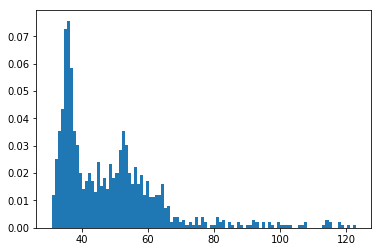

In [12]:
# stocker les altitudes + définir la largeur des intervalles:
alt = res[1]
intervalle = alt[1]-alt[0]
plt.bar((alt[1:]+alt[:-1])/2,PAl, alt[1]-alt[0])
# NB: dans bar, on donne: abscisse, ordonnées, largeur des barres
plt.show()

## Calcul et tracé d'une probabilité conditionnelle

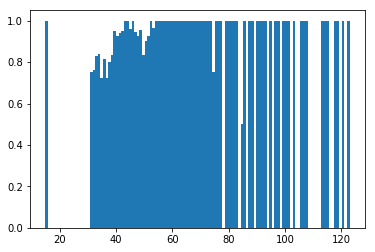

In [13]:
EpVdSAl = pVdSAl[1]
# stocker les altitudes + définir la largeur des intervalles:
intervalle = intervallesAlt[2]-intervallesAlt[1]
plt.bar((intervallesAlt[1:]+intervallesAlt[:-1])/2,EpVdSAl, intervalle)
# NB: dans bar, on donne: abscisse, ordonnées, largeur des barres
plt.show()

##  Tracer la population des stations

#### Création d'une carte des arrondissements

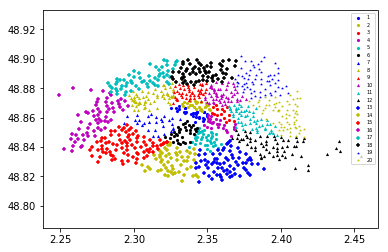

In [14]:
x1 = np.array([station['lng'] for station in stations]) # recuperation des coordonnées
x2 = np.array([station['lat'] for station in stations])
# définition de tous les styles (pour distinguer les arrondissements)
style = [(s,c) for s in "o^+*" for c in "byrmck" ]

# tracé de la figure
plt.figure()
for i in range(1,21):
    ind = np.where(np.array([station['arr'] for station in stations])==i)
    # scatter c'est plus joli pour ce type d'affichage
    plt.scatter(x1[ind],x2[ind], s= 10,marker=style[i-1][0],c=style[i-1][1],linewidths=0)

plt.axis('equal') # astuce pour que les axes aient les mêmes espacements
plt.legend(range(1,21), fontsize=5)
plt.savefig("carteArrondissements.pdf")

#### Création d'une carte montrant la disponibilité des stations

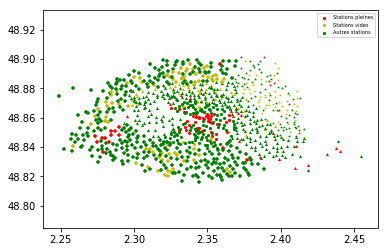

In [15]:
x1 = np.array([station['lng'] for station in stations]) # recuperation des coordonnées
x2 = np.array([station['lat'] for station in stations])
# définition de tous les styles (pour distinguer les arrondissements)
style = [(s,c) for s in "o^+*" for c in "byrmck" ]

Sp = np.where(np.array([1 if station['places dispo'] == 0 else 0 for station in stations]) == 1)
Sv = np.where(np.array([1 if station['places totales'] == station['places dispo'] else 0 for station in stations]) == 1)

# tracé de la figure
plt.figure()
for i in range(1,21):
    # indices des stations situees dans le i-eme arrondissement
    ind, = np.where(np.array([station['arr'] for station in stations])==i)
    # indices des stations pleines
    indSp = np.intersect1d(ind,Sp)
    # indices des stations vides
    indSv = np.intersect1d(ind,Sv)
    # indices des autres stations
    indA = np.array([i for i in ind if i not in indSp and i not in indSv])
    # scatter c'est plus joli pour ce type d'affichage
    plt.scatter(x1[indSp],x2[indSp], s= 10,marker=style[i-1][0],c='r',linewidths=0)
    plt.scatter(x1[indSv],x2[indSv], s= 10,marker=style[i-1][0],c='y',linewidths=0)
    plt.scatter(x1[indA],x2[indA], s= 10,marker=style[i-1][0],c='g',linewidths=0)

plt.axis('equal') # astuce pour que les axes aient les mêmes espacements
plt.legend(['Stations pleines','Stations vides','Autres stations'], fontsize=5)
plt.savefig("disponibilite.pdf")

#### Moyenne, médiane...

In [16]:
altitudes = [station['alt'] for station in stations]
moy = np.mean(altitudes)
print(moy)
med = np.median(altitudes)
print(med)

48.39722485783124
45.01005744934082


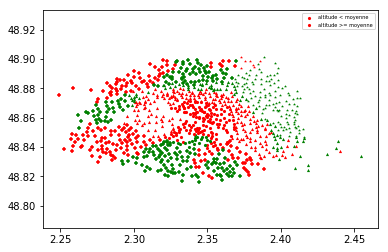

In [17]:
x1 = np.array([station['lng'] for station in stations]) # recuperation des coordonnées
x2 = np.array([station['lat'] for station in stations])
# définition de tous les styles (pour distinguer les arrondissements)
style = [(s,c) for s in "o^+*" for c in "byrmck" ]

InfMoy, = np.where(np.array([station['alt'] for station in stations]) < moy)
# tracé de la figure
plt.figure()
for i in range(1,21):
    # indices des stations situees dans le i-eme arrondissement
    ind, = np.where(np.array([station['arr'] for station in stations])==i)
    # indices des stations dont l'altitude est inferieure a la moyenne
    indInfMoy = np.intersect1d(ind,InfMoy)
    # indices des stations dont l'altitude est superieure ou egale a la moyenne
    indSupMoy = np.array([int(i) for i in ind if i not in indInfMoy])
    # scatter c'est plus joli pour ce type d'affichage
    if indInfMoy.size != 0:
        plt.scatter(x1[indInfMoy],x2[indInfMoy], s=10,marker=style[i-1][0],c='r',linewidths=0)
    if indSupMoy.size != 0:
        plt.scatter(x1[indSupMoy],x2[indSupMoy], s=10,marker=style[i-1][0],c='g',linewidths=0)

plt.axis('equal') # astuce pour que les axes aient les mêmes espacements
plt.legend(['altitude < moyenne','altitude >= moyenne'], fontsize=5)
plt.savefig("altitudesMoy.pdf")

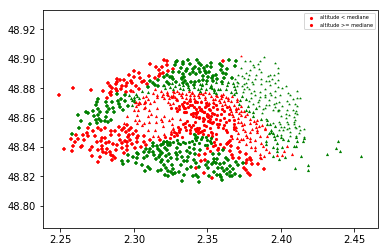

In [18]:
x1 = np.array([station['lng'] for station in stations]) # recuperation des coordonnées
x2 = np.array([station['lat'] for station in stations])
# définition de tous les styles (pour distinguer les arrondissements)
style = [(s,c) for s in "o^+*" for c in "byrmck" ]

InfMed = np.where(np.array([station['alt'] for station in stations]) < med)
# tracé de la figure
plt.figure()
for i in range(1,21):
    # indices des stations situees dans le i-eme arrondissement
    ind, = np.where(np.array([station['arr'] for station in stations])==i)
    # indices des stations dont l'altitude est inferieure a la moyenne
    indInfMed = np.intersect1d(ind,InfMed)
    # indices des stations dont l'altitude est superieure ou egale a la moyenne
    indSupMed = np.array([i for i in ind if i not in indInfMed])
    # scatter c'est plus joli pour ce type d'affichage
    if indInfMed.size != 0:
        plt.scatter(x1[indInfMed],x2[indInfMed], s= 10,marker=style[i-1][0],c='r',linewidths=0)
    if indSupMed.size != 0:
        plt.scatter(x1[indSupMed],x2[indSupMed], s= 10,marker=style[i-1][0],c='g',linewidths=0)

plt.axis('equal') # astuce pour que les axes aient les mêmes espacements
plt.legend(['altitude < mediane','altitude >= mediane'], fontsize=5)
plt.savefig("altitudesMed.pdf")

#### Tests de corrélation

In [19]:
Vd = [1 if station['places dispo'] >= 2 else 0 for station in stations]
df['velos disponibles'] = Vd
df.head()

,alt,arr,lat,lng,places dispo,places totales,velos disponibles
0,36.123348,10,48.872420,2.348395,30,33,1
1,53.454689,8,48.882149,2.319860,43,44,1
2,34.800900,1,48.868217,2.330494,19,37,1
3,65.043762,20,48.870394,2.384222,26,26,1
4,48.124622,15,48.834659,2.295789,22,24,1


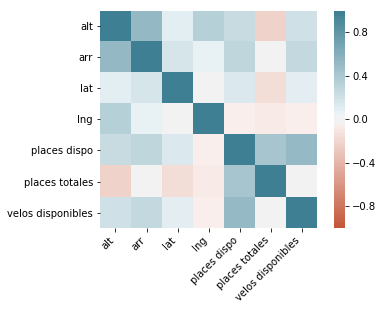

In [20]:
corr = df.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);